In [1]:
import pandas as pd
import numpy as np

from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

/usr/local/lib64/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train = pd.read_csv('sf04classification/train.csv', encoding='utf8', index_col='_id')
df_test = pd.read_csv('sf04classification/test.csv', encoding='utf8', index_col='_id')

In [ ]:
df_train.info() #full, got objects

In [ ]:
df_test.info() #no tgt column. full, got objects

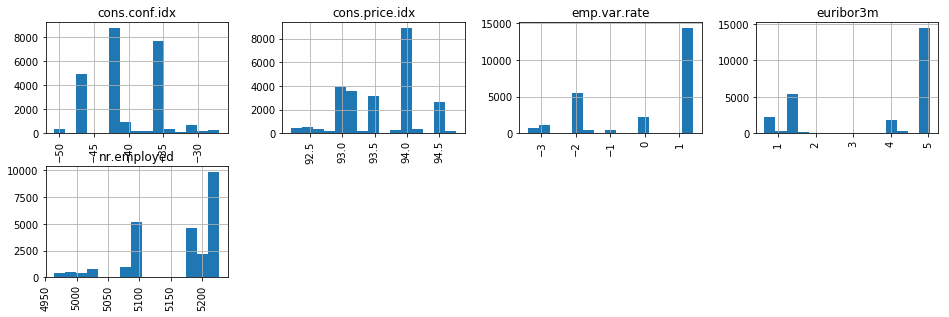

In [3]:
# train.columns
%matplotlib inline
import matplotlib.pyplot as plt
_ = df_train[df_train.dtypes[df_train.dtypes == 'float64'].index].hist(layout=(4, 4), figsize=(16, 10), xrot=90, bins=15)

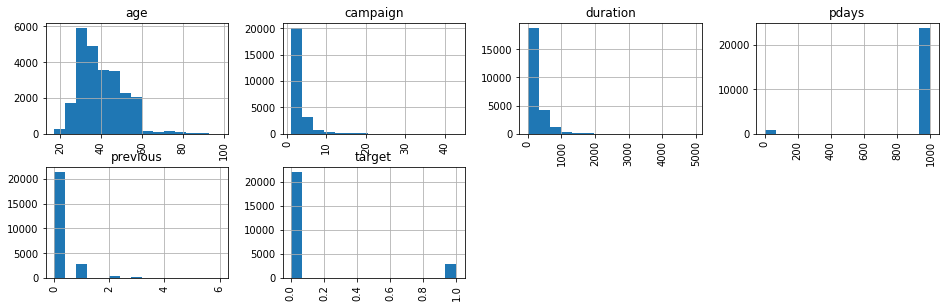

In [4]:
_ = df_train[df_train.dtypes[df_train.dtypes == 'int64'].index].hist(layout=(4, 4), figsize=(16, 10), xrot=90, bins=15)

In [5]:
for col in df_train[df_train.dtypes[df_train.dtypes == 'object'].index]:
    print(df_train[col].value_counts())

admin.           6254
blue-collar      5621
technician       3987
services         2391
management       1758
retired          1001
entrepreneur      853
self-employed     850
housemaid         652
unemployed        594
student           554
unknown           197
Name: job, dtype: int64
married     14871
single       7041
divorced     2755
unknown        45
Name: marital, dtype: int64
university.degree      7309
high.school            5737
basic.9y               3565
professional.course    3112
basic.4y               2523
basic.6y               1399
unknown                1060
illiterate                7
Name: education, dtype: int64
no         19567
unknown     5144
yes            1
Name: default, dtype: int64
yes        12934
no         11156
unknown      622
Name: housing, dtype: int64
no         20334
yes         3756
unknown      622
Name: loan, dtype: int64
cellular     15729
telephone     8983
Name: contact, dtype: int64
may    8199
jul    4364
aug    3731
jun    3191
nov    242

In [6]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop(['month', 'day_of_week', 'default',
                                'contact', 'pdays', 'nr.employed',
                               'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], axis = 1)

    # category code
    df_output = pd.get_dummies(df_output, columns=['job', 'marital', 'education', 'housing', 'loan', 'poutcome'])
        
    return df_output

In [7]:
x = preproc_data(df_train).drop(['target'], axis=1)
y = df_train['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [ ]:
x.info()

### Ниже показан самый главный классификатор

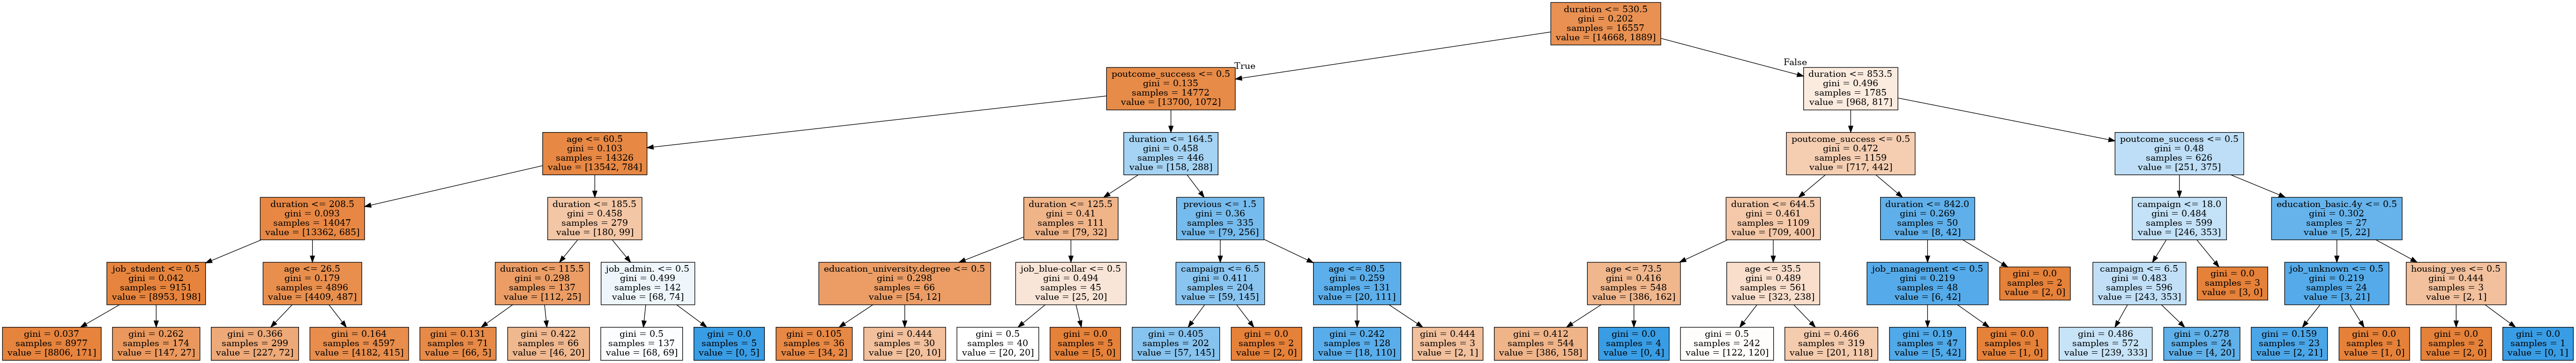

In [8]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train, y_train)

dot_data = StringIO()
export_graphviz(dtc, feature_names=x_train.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train, y_train)
dtc_kfold = cross_val_score(
    dtc,
    x_train,
    y_train,
    scoring='roc_auc',
    cv = cv.split(x_train, y_train)
).mean()


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
knn_kfold = cross_val_score(
    knn,
    x_train,
    y_train,
    scoring='roc_auc',
    cv = cv.split(x_train, y_train)
).mean()


lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_kfold = cross_val_score(
    lr,
    x_train,
    y_train,
    scoring='roc_auc',
    cv = cv.split(x_train, y_train)
).mean()


print("Cross Val Score")
print("dtc_kfold: ", dtc_kfold,
      "\nknn_kfold: ", knn_kfold,
      "\nlr_kfold: ", lr_kfold   
     )

Cross Val Score
dtc_kfold:  0.8445219491859961 
knn_kfold:  0.6153915881287271 
lr_kfold:  0.8795457538168188


In [10]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train, y_train)


knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=1)
knn.fit(x_train, y_train)


lr = LogisticRegression(n_jobs=-1)
lr.fit(x_train, y_train)


print("Roc AUC Score")
print(
    "DTC: ", roc_auc_score(y_test, dtc.predict_proba(x_test)[:,1]),
    "\nKNN: ", roc_auc_score(y_test, knn.predict_proba(x_test)[:,1]),
    "\nLR: ", roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
)

Roc AUC Score
DTC:  0.8401785788270476 
KNN:  0.6152235933480094 
LR:  0.878223406446061


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [13]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train, y_train)
roc_auc_score(y_test, dtc.predict_proba(x_test)[:,1])

0.8401785788270476

In [14]:
dtc = DecisionTreeClassifier(max_depth=100, criterion='entropy')
dtc.fit(x_train, y_train)
roc_auc_score(y_test, dtc.predict_proba(x_test)[:,1])

0.6525735232060712

In [15]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=1000, algorithm="brute", weights="distance")
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8268665719574037

In [16]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=2000, algorithm="brute", weights="distance")
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8238593380233753

In [17]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=10000, algorithm="brute", weights="distance")
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8198101027101395

In [18]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=500, algorithm="brute", weights="distance")
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8309889261362886

In [19]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=500, algorithm="ball_tree")
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8259775601040146

In [20]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=500, algorithm="ball_tree", weights="distance")
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8309171883195182

In [21]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=500, algorithm="ball_tree", weights="distance", leaf_size=100)
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8309073675274896

In [22]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=500, algorithm="kd_tree")
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8259626754660963

In [23]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=500, algorithm="kd_tree", weights="distance")
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8309139658721338

In [24]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=500, algorithm="kd_tree", weights="distance", leaf_size=100)
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8309632232821517

In [25]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=500, algorithm="brute")
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.826088811263712

In [26]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=500, algorithm="brute", weights="distance")
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8309889261362886

In [27]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=500, algorithm="auto")
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8259626754660963

In [28]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=500, algorithm="auto", weights="distance")
knn.fit(x_train, y_train)
roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

0.8309139658721338

In [29]:
lr = LogisticRegression(n_jobs=-1)
lr.fit(x_train, y_train)
roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.878223406446061

In [30]:
lr = LogisticRegression(n_jobs=-1, penalty="l1")
lr.fit(x_train, y_train)
roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])

/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.8783242230142282

In [11]:
lr.fit(x, y)

df_test = pd.read_csv('sf04classification/test.csv', encoding='utf8')
ans = lr.predict(preproc_data(df_test.drop(['_id'], axis=1)))
result = pd.DataFrame()
result['_id'] = df_test['_id']
result['target'] = ans
result.to_csv('submit.csv', index=False)

/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [12]:
#!diff submit.csv sf04classification/sample_submission.csv
#!echo
#!echo "========================"
#!echo
!cut -f2 --delimiter="," submit.csv | grep 1 | wc -l

901
